In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib
import requests
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error  
from sklearn.model_selection import cross_val_score
import warnings
%matplotlib inline

In [33]:
# Importing data
df = pd.read_csv("D:\wind_data.csv")

In [34]:
# Check the first few rows of the dataframe
df.head()


# Check for duplicate rows
duplicate_rows = df.duplicated()

# Remove duplicate rows
df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

In [35]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate mean, median, standard deviation, skewness, and kurtosis
statistics = numeric_columns.agg(['mean', 'median', 'std', 'skew', 'kurt'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Get basic statistics using describe()
basic_statistics = numeric_columns.describe()

# Print the results
print("Mean, Median, Standard Deviation, Skewness, Kurtosis:")
print(statistics)

print("\nCorrelation Matrix:")
print(correlation_matrix)

print("\nBasic Statistics:")
print(basic_statistics)

Mean, Median, Standard Deviation, Skewness, Kurtosis:
        active_power_calculated_by_converter  active_power_raw  \
mean                              525.886061        537.639468   
median                            379.989929        383.985926   
std                               474.619576        482.394907   
skew                                1.094894          1.079560   
kurt                                0.461064          0.356482   

        ambient_temperature  generator_speed  generator_winding_temp_max  \
mean              25.573921       931.130882                   60.730112   
median            27.919035       884.068502                   60.034490   
std                8.025649       193.674384                    9.721582   
skew              -0.405606        -0.432870                    0.482791   
kurt              -1.102810         1.561075                    1.217988   

        grid_power10min_average  nc1_inside_temp  nacelle_temp  \
mean                 527.5

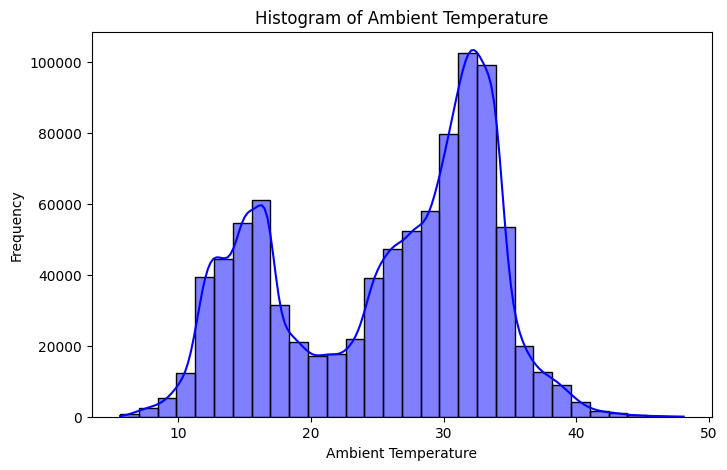

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'D:\wind_data.csv'  # Update this path
data = pd.read_csv(file_path)

# Data Preprocessing
# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Drop rows with missing values (if any)
data.dropna(inplace=True)



# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['ambient_temperature'], bins=30, kde=True, color='blue')
plt.title('Histogram of Ambient Temperature')
plt.xlabel('Ambient Temperature')
plt.ylabel('Frequency')
plt.savefig('histogram.png')
plt.show()



# Save to GitHub
# Ensure your code and plots are saved to your local GitHub repository. Include the link in your report.


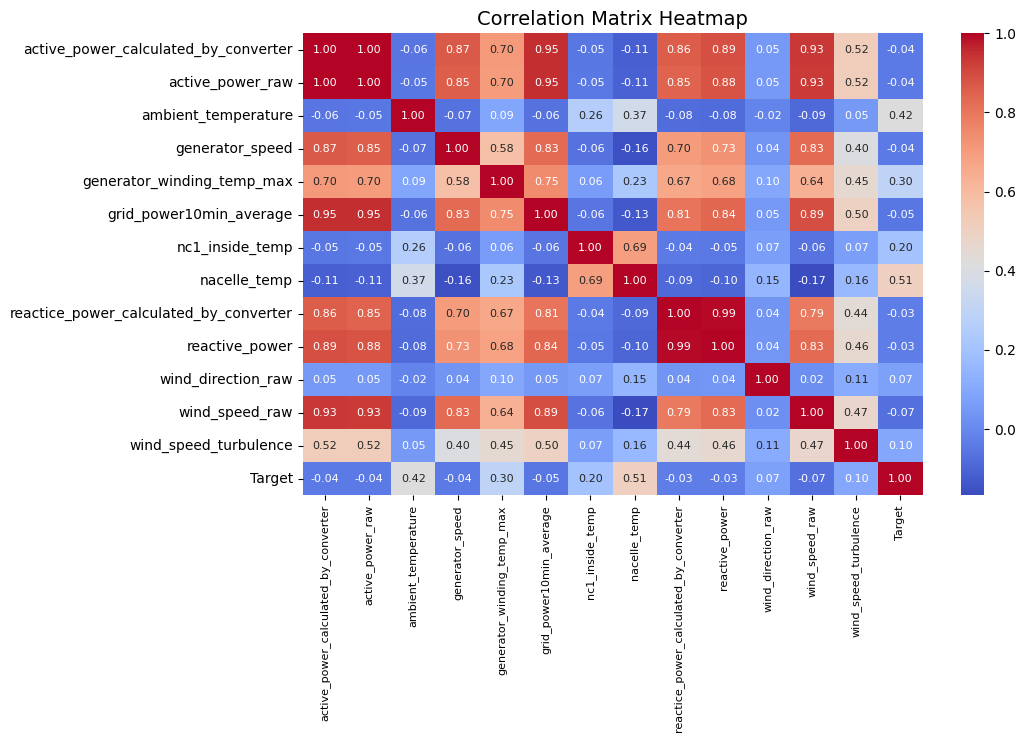

In [51]:
# Exclude non-numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8})  # Set smaller font size for annotations
plt.title("Correlation Matrix Heatmap", fontsize=14)  # Set smaller title font size
plt.xticks(fontsize=8, rotation=90)  # Rotate x-axis labels by 90 degrees
plt.yticks(fontsize=10, rotation=0)  # Keep y-axis labels horizontal
plt.show()


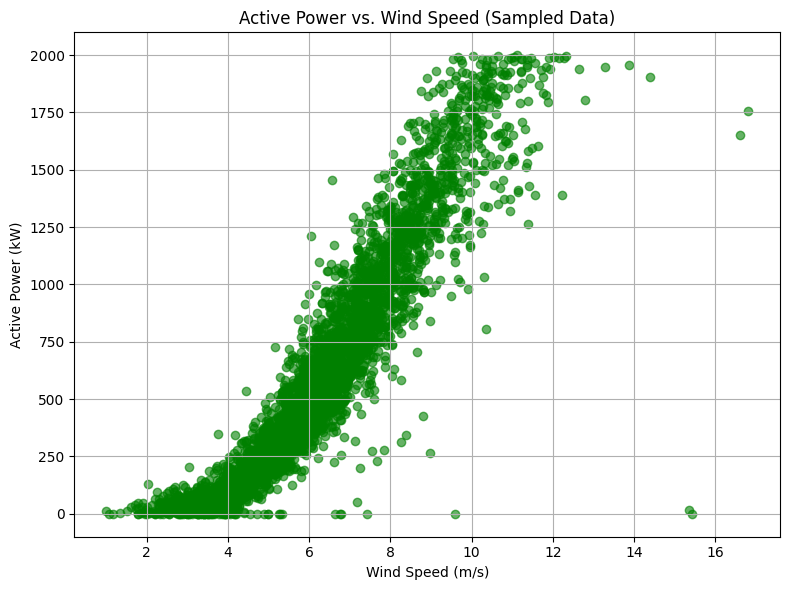

In [38]:
# Downsample the data for scatter plot
sampled_data = data.sample(n=5000, random_state=42)  # Adjust the n value as needed

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sampled_data['wind_speed_raw'], sampled_data['active_power_calculated_by_converter'], alpha=0.6, color='green')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Active Power (kW)')
plt.title('Active Power vs. Wind Speed (Sampled Data)')
plt.grid(True)
plt.tight_layout()
plt.show()

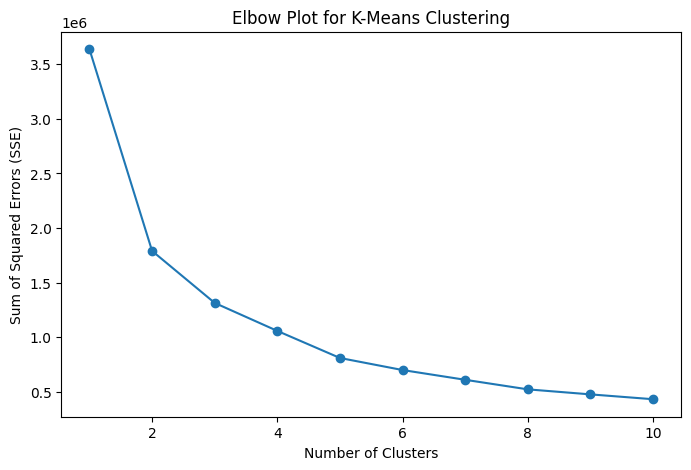

In [39]:
# Normalize numerical data for clustering
scaler = StandardScaler()
features_to_scale = [
    'active_power_calculated_by_converter', 'ambient_temperature', 
    'wind_speed_raw', 'generator_speed'
]
data_scaled = scaler.fit_transform(data[features_to_scale])

# -----------------------------------------------
# K-Means Clustering
# -----------------------------------------------

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.savefig('elbow_plot.png')
plt.show()


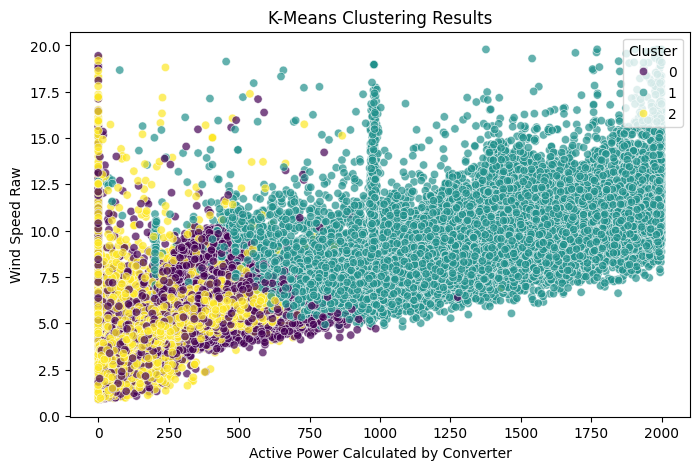

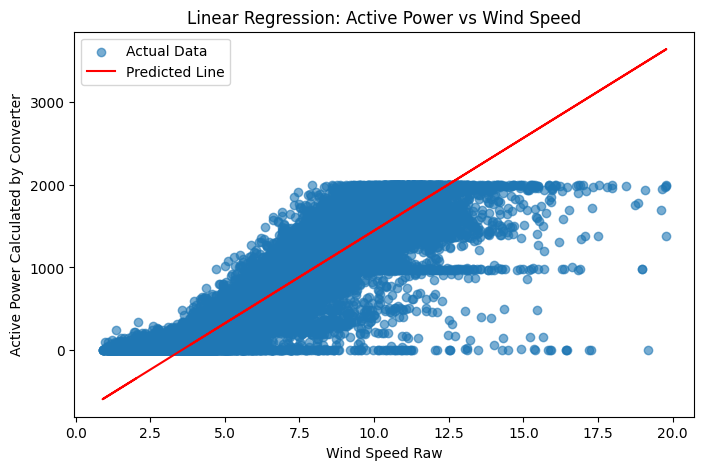

In [40]:
# Fit K-Means with optimal clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=data['active_power_calculated_by_converter'], 
    y=data['wind_speed_raw'], 
    hue=data['Cluster'], 
    palette='viridis', 
    alpha=0.7  # Add transparency
)
plt.title('K-Means Clustering Results')
plt.xlabel('Active Power Calculated by Converter')
plt.ylabel('Wind Speed Raw')
plt.legend(title='Cluster', loc='upper right')  # Specify legend location
plt.savefig('cluster_plot.png', dpi=300)  # Save with higher resolution
plt.show()


# -----------------------------------------------
# Linear Regression (Line Fitting)
# -----------------------------------------------

# Using 'wind_speed_raw' to predict 'active_power_calculated_by_converter'
X = data[['wind_speed_raw']].values
y = data['active_power_calculated_by_converter'].values

# Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot Line Fitting
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label='Actual Data', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.title('Linear Regression: Active Power vs Wind Speed')
plt.xlabel('Wind Speed Raw')
plt.ylabel('Active Power Calculated by Converter')
plt.legend()
plt.savefig('line_fit_plot.png')
plt.show()

In [61]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 29064.089384372262
R-squared (R²): 0.870627661617926
